In [5]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from datetime import datetime
from matplotlib.pyplot import text
import pandas as pd
import cdflib
import numpy as np
import glob
import requests
import warnings
import matplotlib.ticker as mticker
fname = 'dmsp-f18_ssj_precipitating-electrons-ions_20120101_v1.1.1.cdf'
cdf_file = cdflib.CDF(fname)

In [113]:
import warnings
warnings.filterwarnings("ignore")
data_variables=cdf_file.cdf_info()['zVariables']
data_vars=[]
df=pd.DataFrame()
for variable in data_variables:
    if cdf_file.varget(variable).ndim !=1:
        Data=cdf_file.varget(variable)
        _,c=Data.shape
        for i in range(c):
            df[variable +str(i)] = pd.DataFrame(Data[:,i])
            data_vars.append(variable +str(i))  
    else:
        df[variable]=pd.DataFrame(cdf_file.varget(variable))
        data_vars.append(variable)

In [114]:
## collecting the right columns for averaging here only variable anmes start with ELE and ION
ix=[item.startswith('ELE') for item in data_vars]
a=list(np.array(data_vars)[ix])
ix=[item.startswith('ION') for item in data_vars]
b=list(np.array(data_vars)[ix])
aa=a+b

In [115]:
ix = df['SC_AACGM_LAT']>40 # Northern hemsiphere
df_NH=df[ix]
df_NH=df_NH.round()
 
f=df_NH.groupby(["SC_AACGM_LTIME", "SC_AACGM_LAT"])[aa].apply(lambda g: g.mean(skipna=True))
f=f.reset_index()

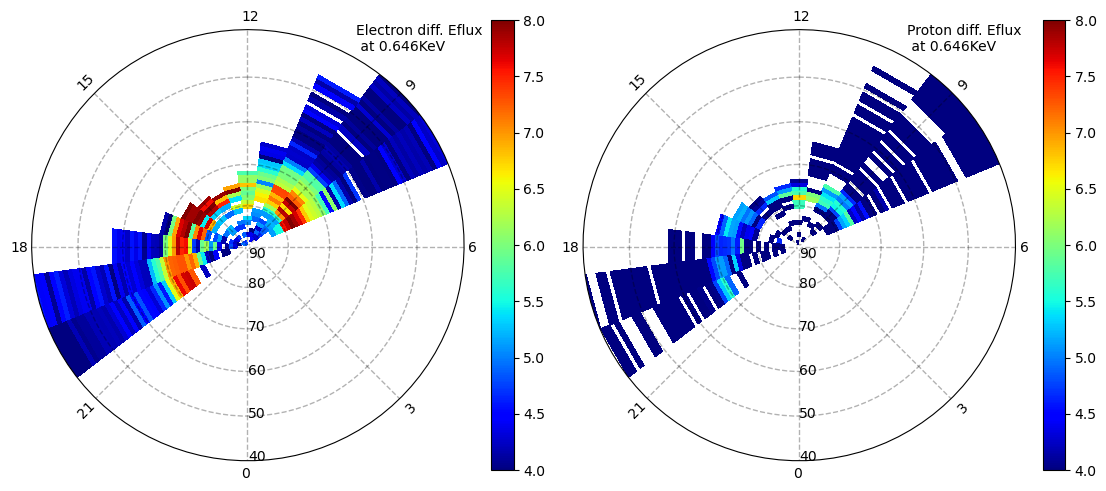

In [131]:
## dmsp_grid
lati = np.arange(f["SC_AACGM_LAT"].min(), f["SC_AACGM_LAT"].max()+1)
tt = np.arange(f["SC_AACGM_LTIME"].min(), f["SC_AACGM_LTIME"].max()+1)
x, y = np.meshgrid(tt, lati)

mlt = f["SC_AACGM_LTIME"]
latitude = f["SC_AACGM_LAT"]
ch=10
ePrep = f["ELE_DIFF_ENERGY_FLUX"+str(ch)]
iPrep = f["ION_DIFF_ENERGY_FLUX"+str(ch)]
egrided_data = np.nan*(np.ones(x.shape))
igrided_data = np.nan*(np.ones(x.shape))

for i in range(len(x[0, :])):
    ii = np.where(np.in1d(mlt.values, x[0, i]))
    # np.array(latitude[ii[0]])
    mm = np.where(np.in1d(y[:, 0], np.array(latitude[ii[0]])))
    egrided_data[mm, i] = ePrep[ii[0]]
    igrided_data[mm, i] = iPrep[ii[0]]
    
from dmsp_reader import dmsp_polar_plot
a=dmsp_polar_plot(x,y,egrided_data, igrided_data, ch=ch, savefig=False)